In [801]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [802]:
# Importing lead dataset
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# DATA HANDLING

In [803]:
# checking the shape of the data 
lead_df.shape

(9240, 37)

In [804]:
# checking non null count and datatype of the variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [805]:
# Describing data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# DATA CLEANING 🤓

In [806]:
# Converting all the values to lower case
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [807]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('select', np.nan)

# There are 'Select' values in many columns.It may be because the customer did not select any option from the list, so it shows 'Select'.'Select' values are as good as null.

In [808]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [809]:
# checking the columns for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [810]:
# dropping the columns with missing values greater than or equal to 40% .
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [811]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

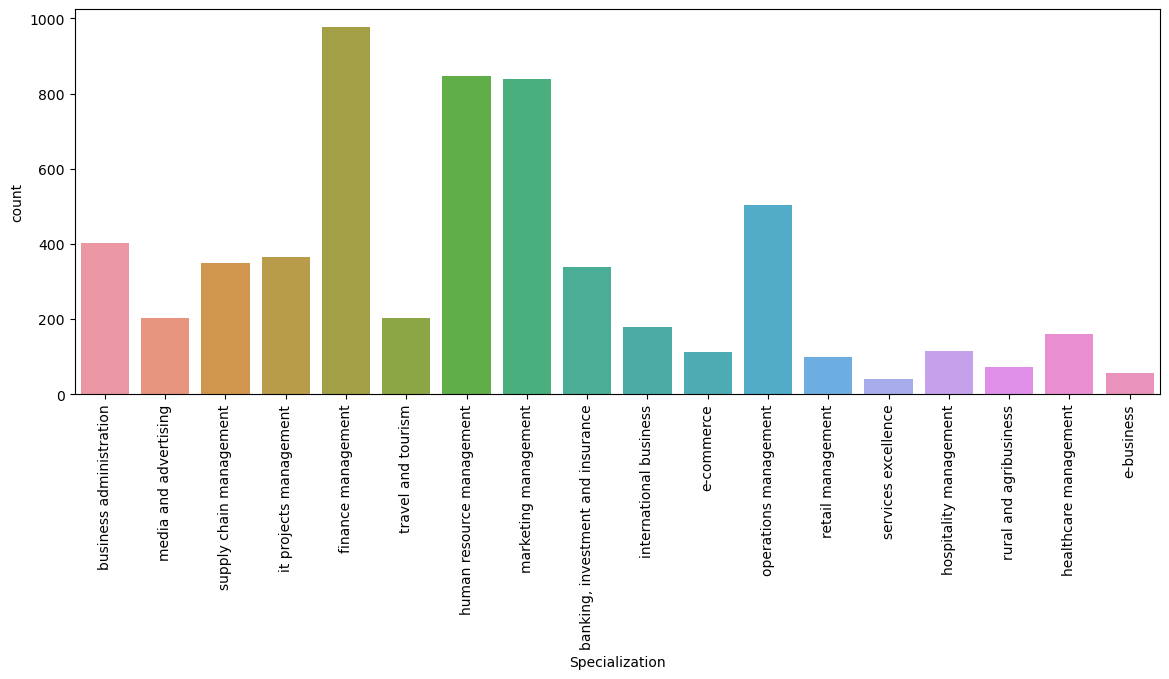

In [812]:
plt.figure(figsize=(14,5))
sns.countplot(x=lead_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [813]:
# "Since the 'Specialization' column contains 37% missing values, it is plausible that leads might leave this field blank for reasons such as being a student, lacking a specific specialization, or their specialization not being among the provided options. To address this, we can introduce a new category, 'Others,' to represent instances where the 'Specialization' information is not provided."

In [814]:
# Creating a separate category called 'Others' for this 
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

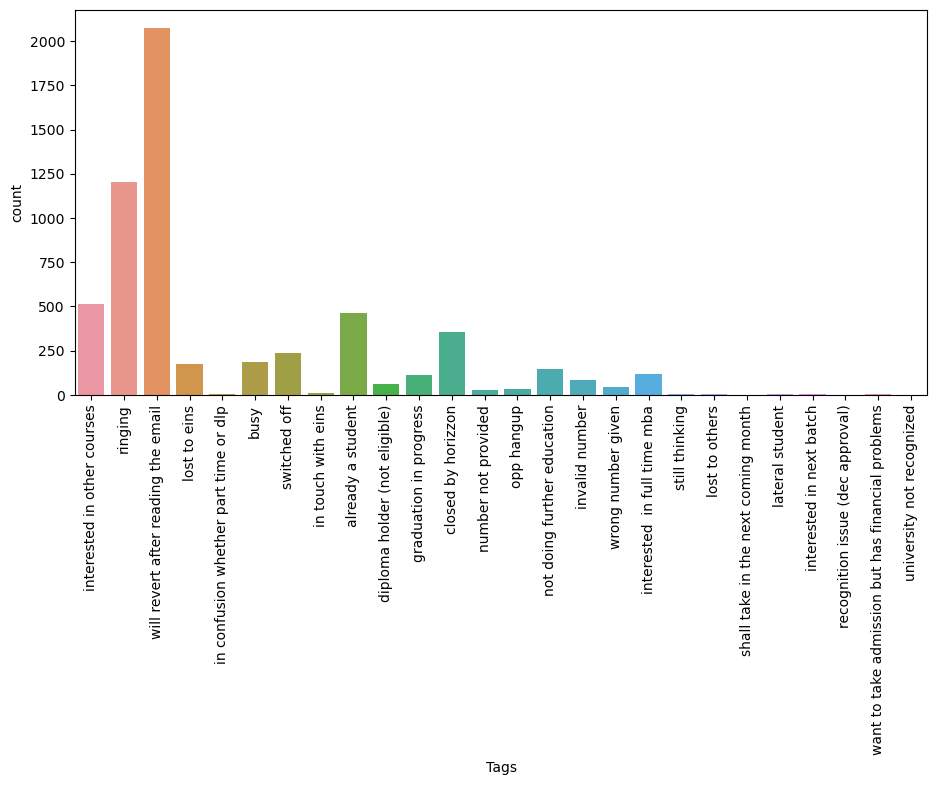

In [815]:
# Visualizing Tags column
plt.figure(figsize=(11,5))
sns.countplot(x=lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

In [816]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'

lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [817]:
# Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

<function matplotlib.pyplot.show(close=None, block=None)>

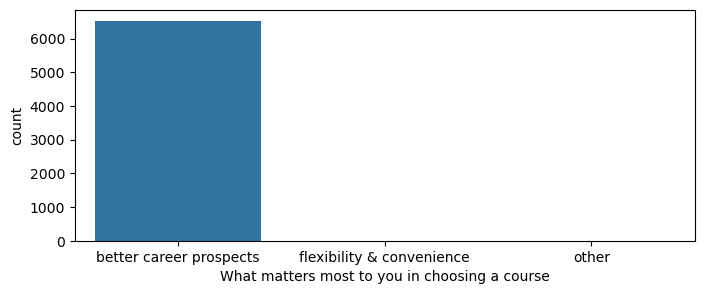

In [818]:
# Visualizing  columns

plt.figure(figsize=(8,3))
sns.countplot(x=lead_df['What matters most to you in choosing a course'])
plt.xticks
plt.show

In [819]:
# Finding the percentage of the different categories of this column:

round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100


# As we can see that the variable is highly skewed meaning that all of its values are the same, it is considered a constant or near-constant variable. Such a variable does not contribute any variability to the dataset and is essentially constant for all observations.

better career prospects      100.0
flexibility & convenience      0.0
other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [820]:
# Dropping this column 
lead_df = lead_df.drop('What matters most to you in choosing a course',axis=1)

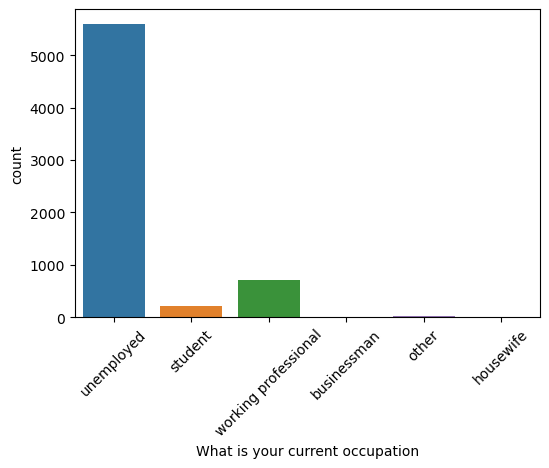

In [821]:
# Visualising columns

plt.figure(figsize=(6,4))
sns.countplot(x=lead_df['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [822]:
# Finding the percentage of the different categories of this column:
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

unemployed              85.0
working professional    11.0
student                  3.0
other                    0.0
housewife                0.0
businessman              0.0
Name: What is your current occupation, dtype: float64

In [823]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

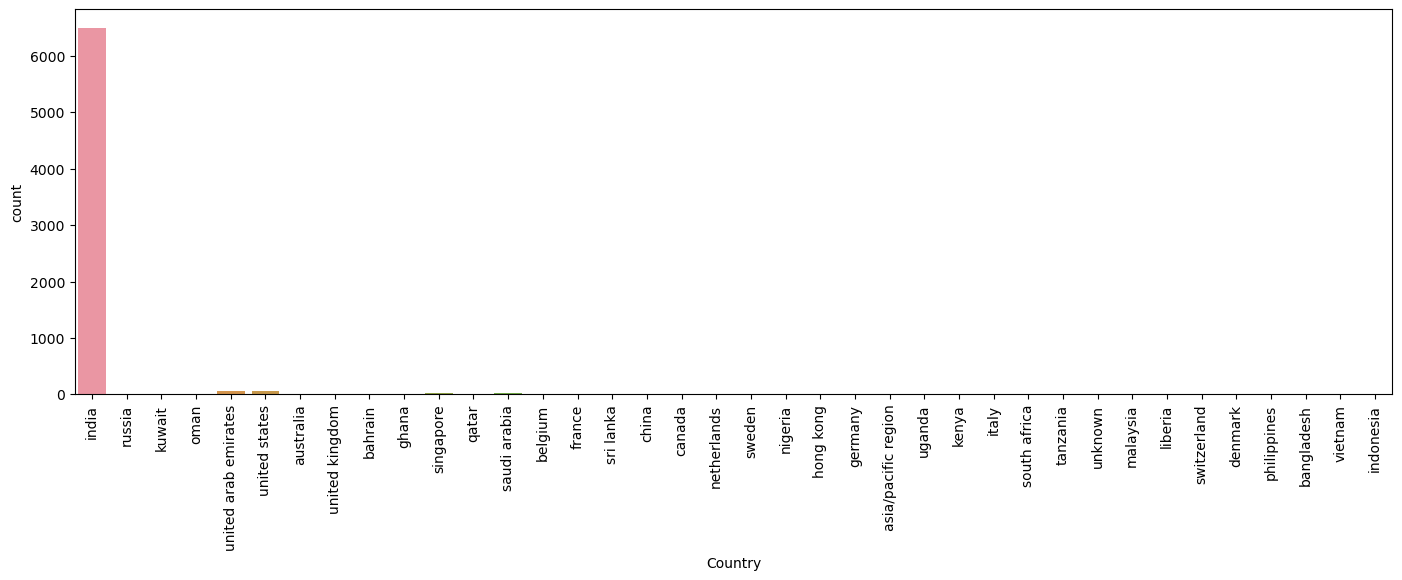

In [824]:
# visualising columns

plt.figure(figsize=(17,5))
sns.countplot(x= lead_df['Country'])
plt.xticks(rotation=90)
plt.show()

In [825]:
# "While observing that the 'Country' column is highly skewed, it remains a crucial piece of information regarding the leads. Given that the majority of values are 'India,' we can address the missing values in this column by imputing them with the prevalent value, 'India.'"


# Imputing the missing data in the 'Country' column with 'India'

lead_df['Country']=lead_df['Country'].replace(np.nan,'India')




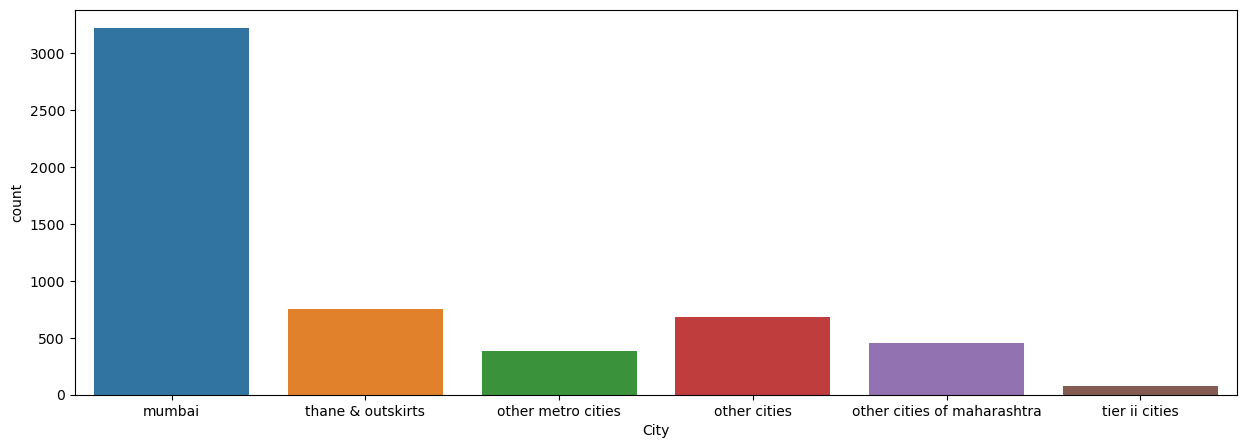

In [826]:
# visualizing columns

plt.figure(figsize=(15,5))
sns.countplot(x =lead_df['City'])
plt.xticks
plt.show()

In [827]:
# Finding the percentage of the different categories of this column:

round(lead_df['City'].value_counts(normalize=True),2)*100

mumbai                         58.0
thane & outskirts              13.0
other cities                   12.0
other cities of maharashtra     8.0
other metro cities              7.0
tier ii cities                  1.0
Name: City, dtype: float64

In [828]:
# Imputing the missing data in the 'City' column with 'Mumbai'

lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

# Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [829]:
# Finding the null percentages across columns after removing the above columns

round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [830]:
# Dropping the rows with null values

lead_df.dropna(inplace = True)

In [831]:
# calculate null percentages across columns after removing the above columns

round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [832]:
lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


# UNIVARIATE AND BIVARIATE ANALYSIS 🤓

In [833]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

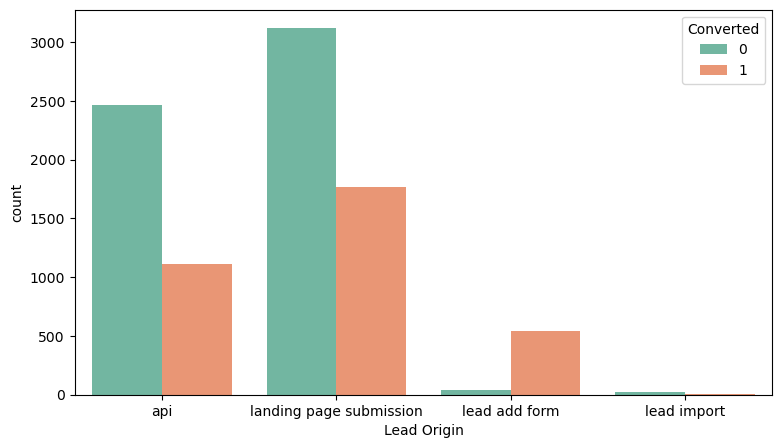

In [834]:
plt.figure(figsize=(9,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks()
plt.show()

In [835]:
# Inferences :
# API and Landing Page Submission have more conversion rate.
# Lead Add Form has more conversion rate but count of lead are not very high.
# Lead Import are very less in count.

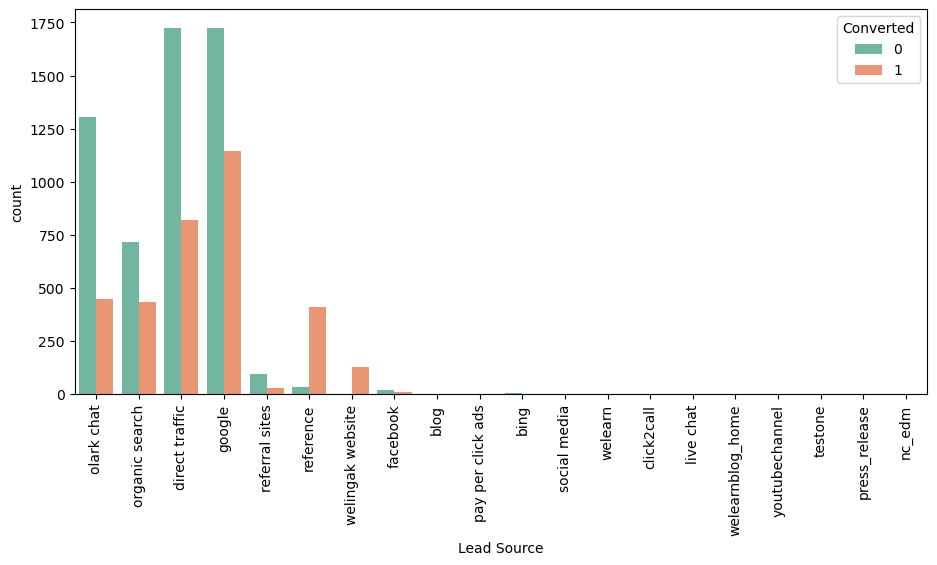

In [836]:
plt.figure(figsize=(11,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df, palette='Set2')
plt.xticks(rotation =90)
plt.show()

In [837]:
# Create a new category 'Others' for some of the Lead Sources which haveless values.

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['click2call', 'live chat', 'nc_edm', 'pay per click ads', 'press_release',
  'social media', 'welearn', 'bing', 'blog', 'testone', 'welearnblog_home', 'youtubechannel'], 'Others')


In [838]:
# checking replaced values
lead_df['Lead Source'].value_counts()

google              2873
direct traffic      2543
olark chat          1753
organic search      1154
reference            443
welingak website     129
referral sites       125
facebook              31
Others                23
Name: Lead Source, dtype: int64

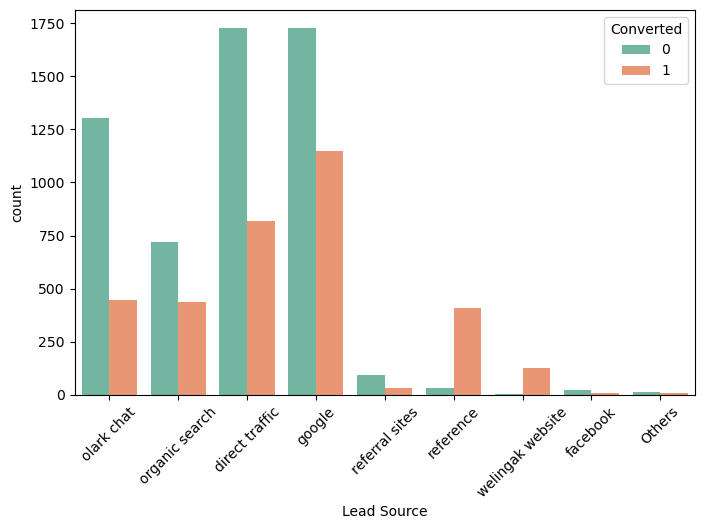

In [839]:
# Visualizing again after replacement
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 45)
plt.show()

In [840]:
#Inferences:
# Google and Direct traffic creates maximum number of leads.
# Conversion Rate of reference leads and leads through welingak website is high.

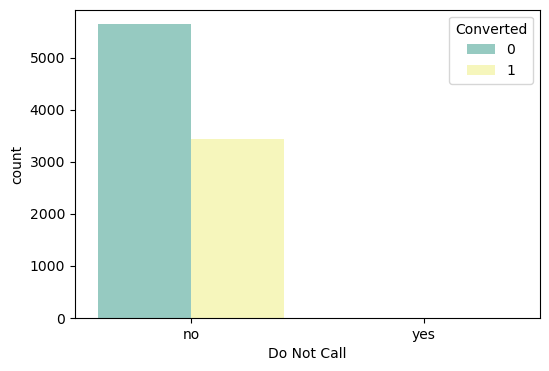

In [841]:
plt.figure(figsize=(6,4))
sns.countplot( x="Do Not Call", hue = "Converted", data = lead_df,palette='Set3')
plt.xticks
plt.show()

# most entries are no , no inferences can be drawn.

In [842]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

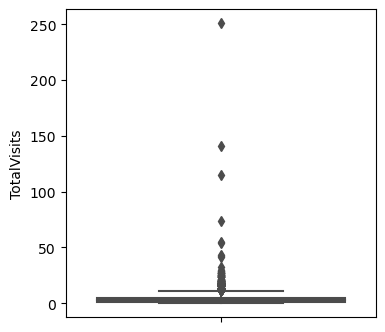

In [843]:
# visualization
plt.figure(figsize=(4,4))
sns.boxplot(y=lead_df['TotalVisits'],orient='vert',palette='Set1')
plt.show()


In [844]:
# capping the outliers to 95% values
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

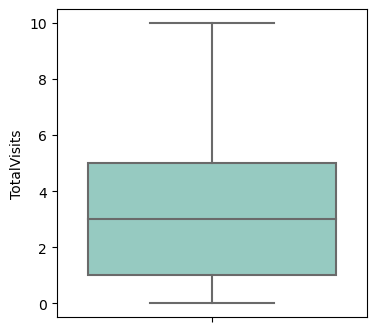

In [845]:
# Visualizing again after capping
plt.figure(figsize=(4,4))
sns.boxplot(y=lead_df['TotalVisits'],orient='vert',palette='Set3')
plt.show()

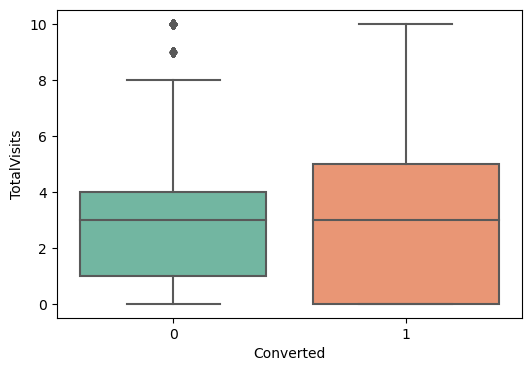

In [846]:
plt.figure(figsize=(6,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set2')
plt.show()

In [847]:
# Inferences:
# Median of converted and not converted leads are the same,  no conclusion cann be drawn.

In [848]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

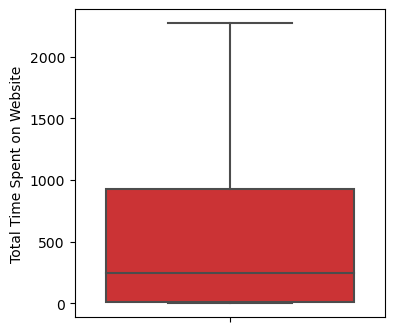

In [849]:
plt.figure(figsize=(4,4))
sns.boxplot(y= lead_df['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

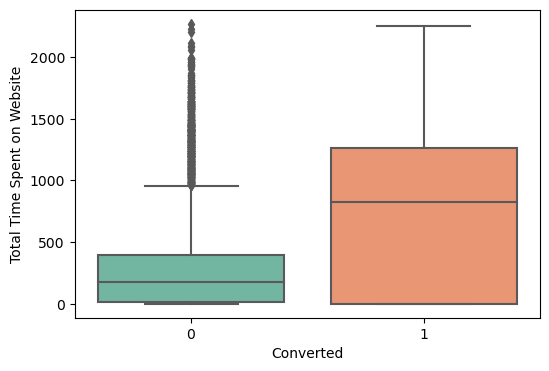

In [850]:
plt.figure(figsize=(6,4))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set2')
plt.show()

In [851]:
#Inferences:
# Leads spending more time on the website are likely to be converted.

In [852]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

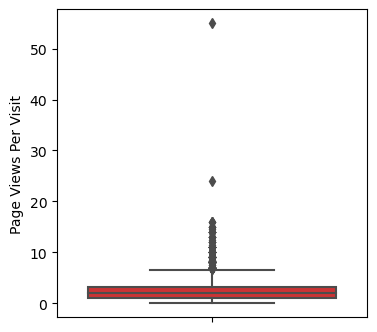

In [853]:
plt.figure(figsize=(4,4))
sns.boxplot(y=lead_df['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show

In [854]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

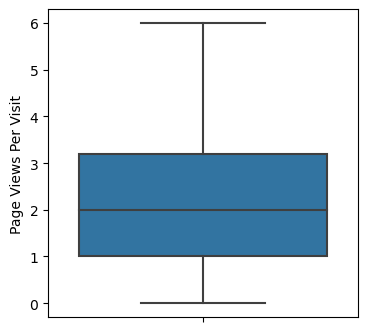

In [855]:
# Visualizing again after capping
plt.figure(figsize=(4,4))
sns.boxplot(y=lead_df['Page Views Per Visit'],orient='vert')
plt.show()

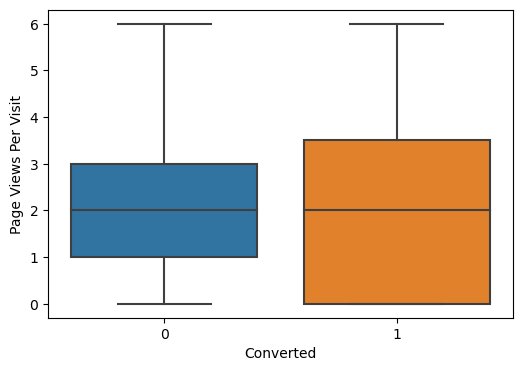

In [856]:
plt.figure(figsize=(6,4))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_df)
plt.show()

In [857]:
#Inferences:
#Median for converted and unconverted leads is the same for page viewers , nothing can be drawn from the observation.

In [858]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       email opened
freq              3432
Name: Last Activity, dtype: object

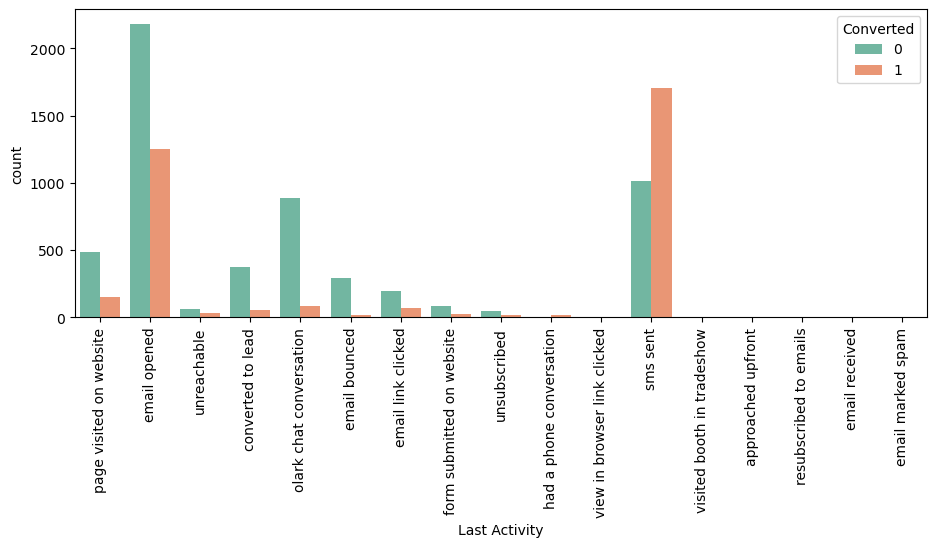

In [859]:
plt.figure(figsize=(11,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [860]:
# club the last activities to "Other_Activity" which are having less data.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['had a phone conversation', 'view in browser link clicked', 
                                                       'visited booth in tradeshow', 'approached upfront',
                                                       'resubscribed to emails','email received', 'email marked spam'], 'Other_Activity')

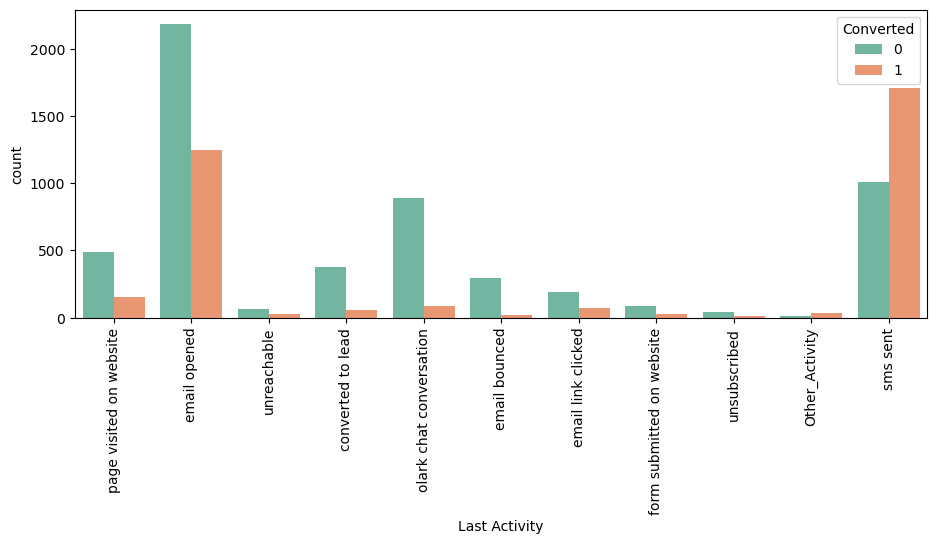

In [861]:
# Visualizing again after conversion
plt.figure(figsize=(11,4))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [862]:
# Inferences
# Most of the lead have opened the mail a their last activity.


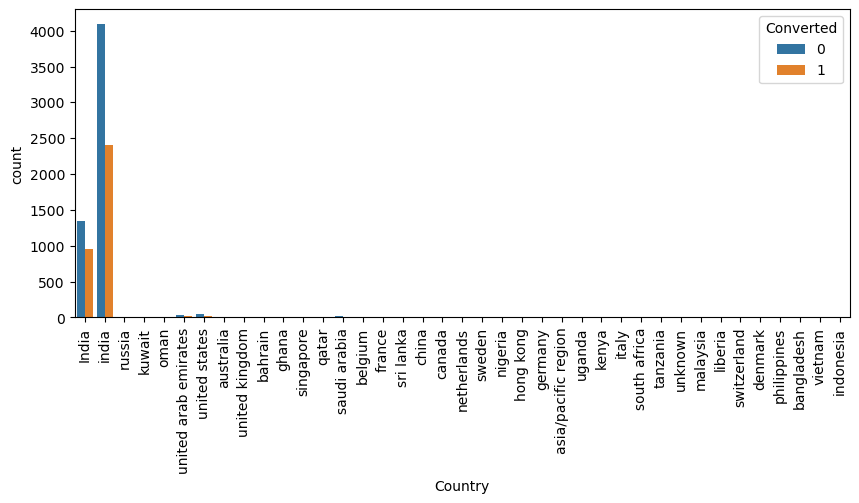

In [863]:
plt.figure(figsize=(10,4))
sns.countplot(x="Country", hue = "Converted", data = lead_df)
plt.xticks(rotation=90)
plt.show()

In [864]:
#Inferences
# Most values are 'India',thus no such inference can be drawn

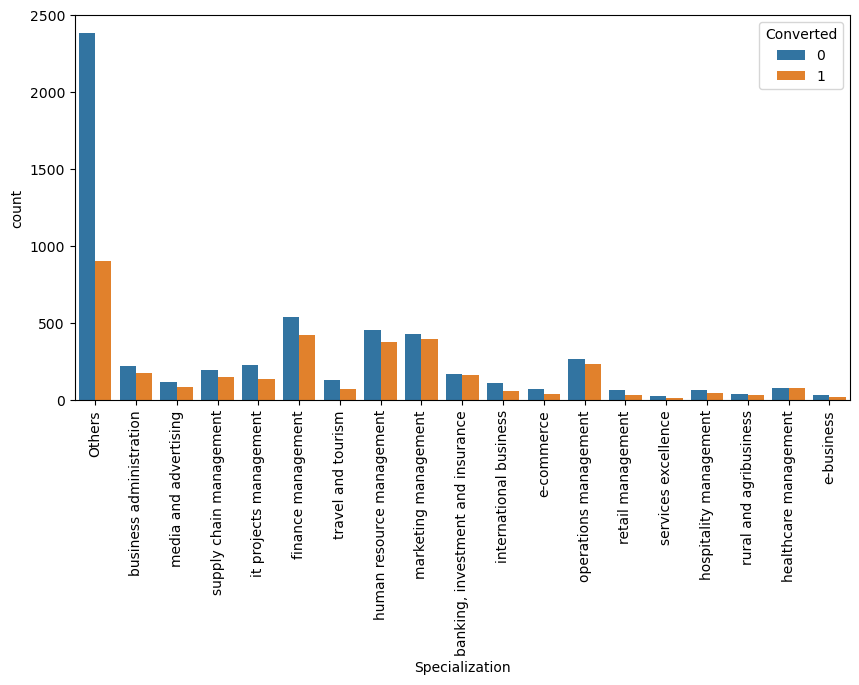

In [865]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

In [866]:
#Inference
# Specialization with high conversion rate should be focussed

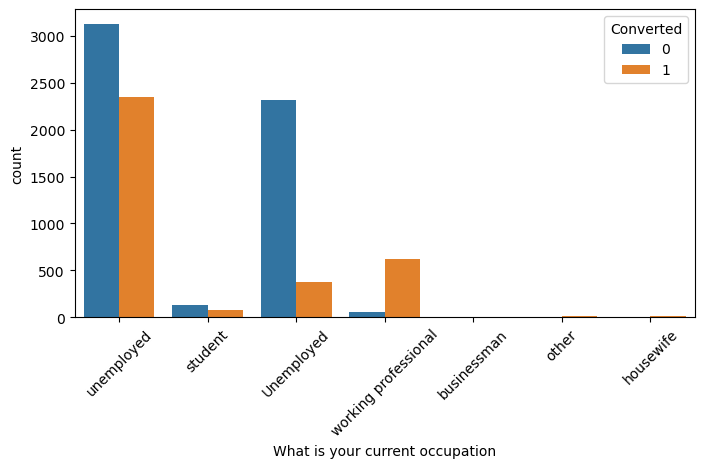

In [867]:
plt.figure(figsize=(8,4))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 45)
plt.show()

In [868]:
# Inference
# Working Professionals have high chances of joining the course.
# Unemployed leads are the most in numbers but has less conversion rate comparatively.

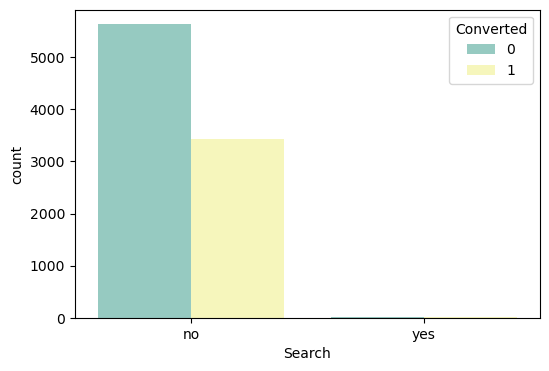

In [869]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Search", hue = "Converted", data = lead_df,palette='Set3')
plt.xticks
plt.show()

# more entries are no so no observations can be drawn.

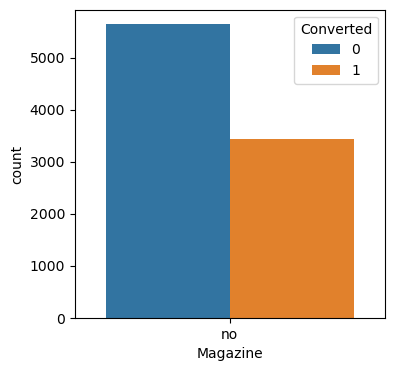

In [870]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df)
plt.xticks
plt.show()

# most entried are no , no inference can be drawn.

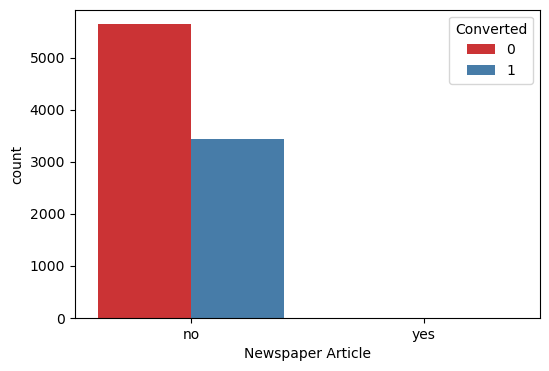

In [871]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks
plt.show()

# most entries are no, no inference can be drawn.

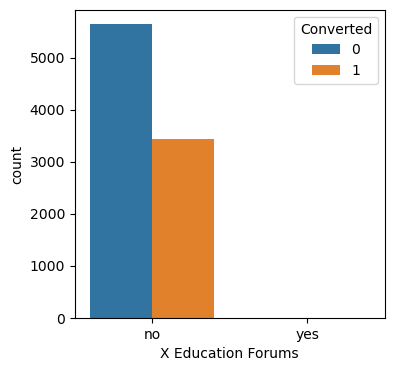

In [872]:
plt.figure(figsize=(4,4))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df)
plt.xticks
plt.show()

# no inferences can be drawn.

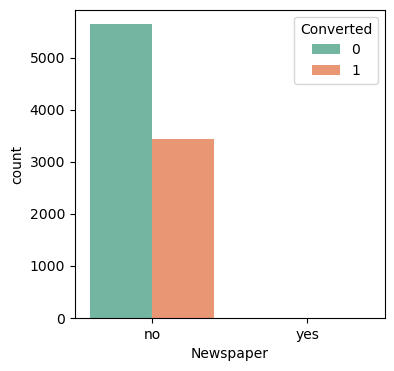

In [873]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

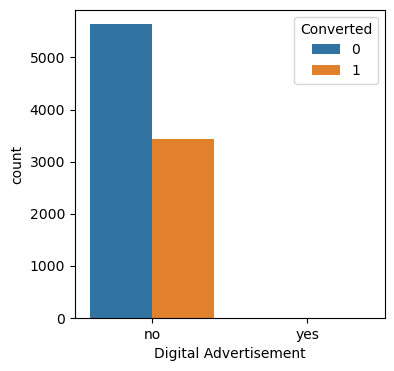

In [874]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df)
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

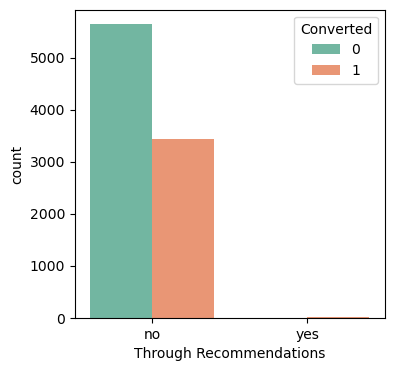

In [875]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks
plt.show()

# most entries are no, no inference can be drawn.

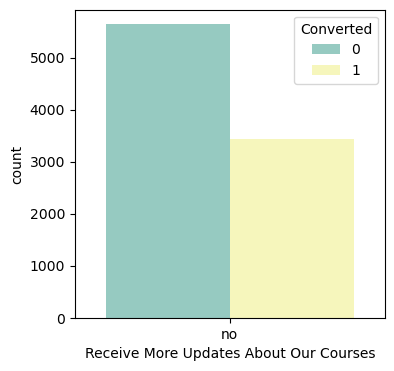

In [876]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df,palette='Set3')
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

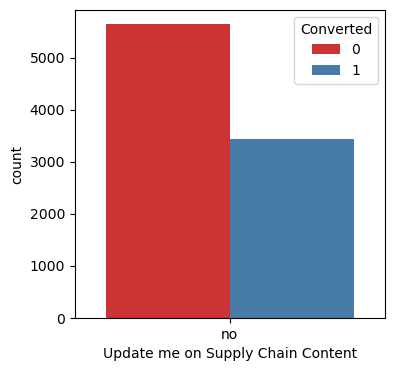

In [877]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

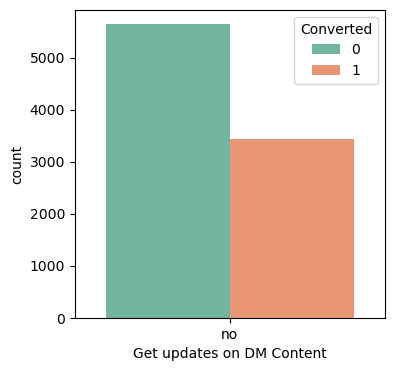

In [878]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

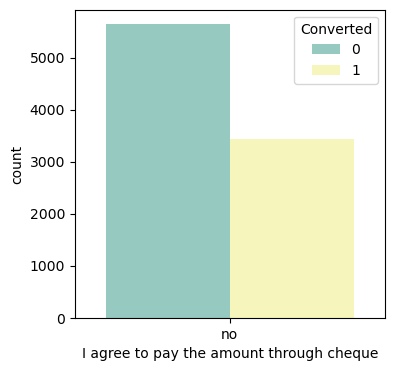

In [879]:
plt.figure(figsize=(4,4))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df,palette='Set3')
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

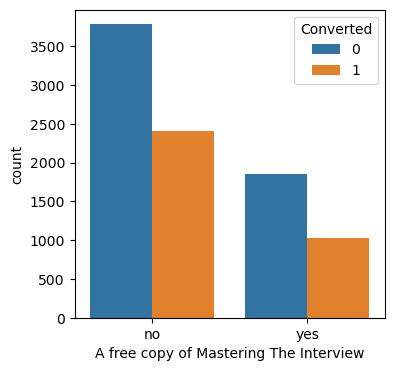

In [880]:
plt.figure(figsize=(4,4))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df)
plt.xticks
plt.show()


# most entries are no, no inference can be drawn.

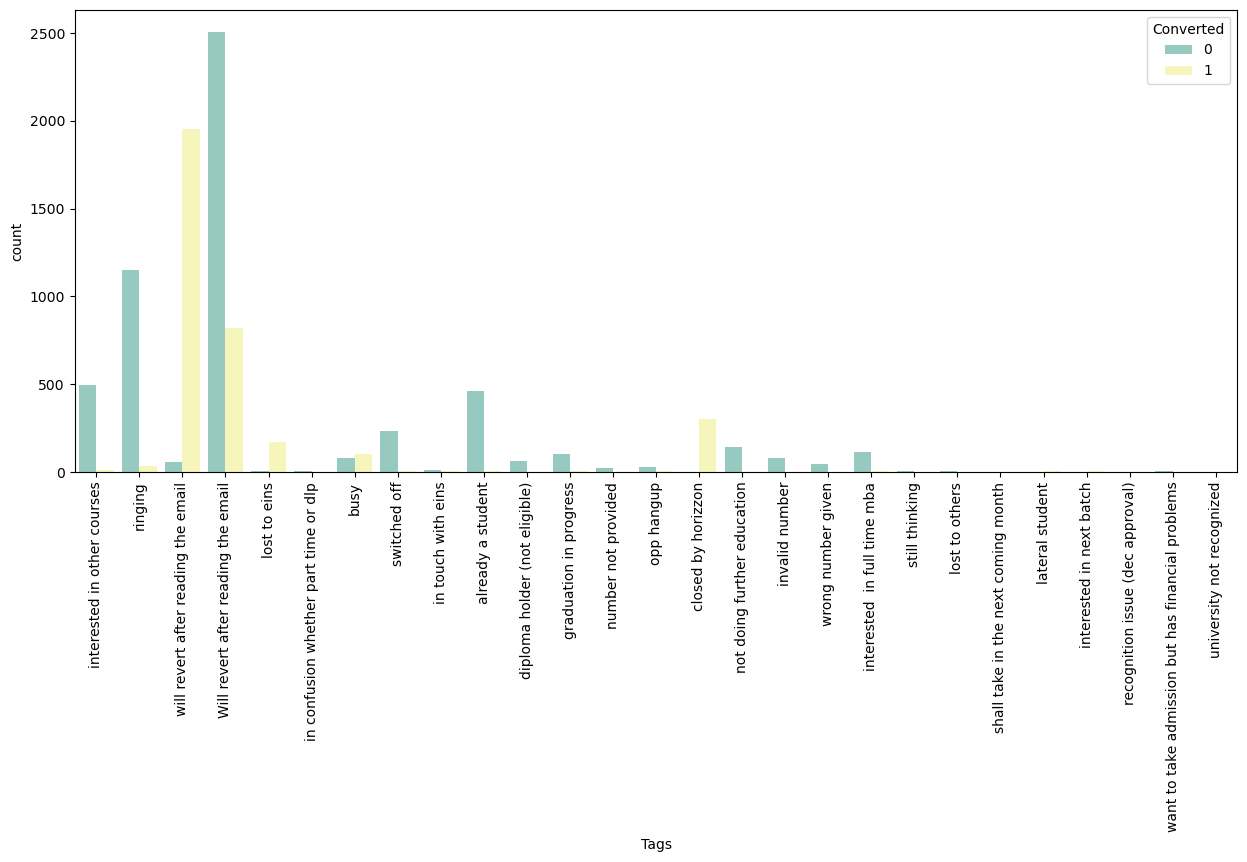

In [881]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df,palette='Set3')
plt.xticks(rotation = 90)
plt.show()


# inference
#"As the 'Lead Source' column is specifically created by the sales team for their analytical purposes and is not intended for model building, it is imperative to exclude this column from the dataset before proceeding with the construction of the model."

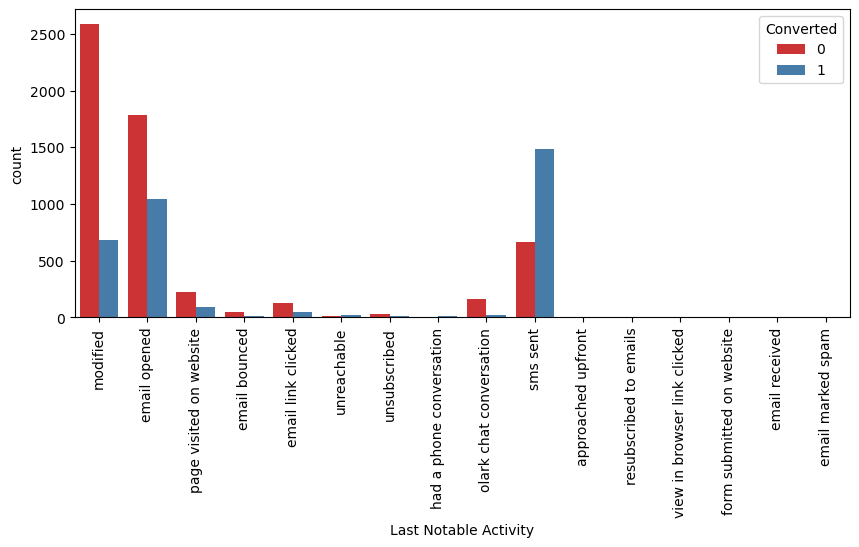

In [882]:
plt.figure(figsize=(10,4))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [883]:
# inference
# In univariate analysis we can see that many columns are not adding any useful information,thus we can drop them.

In [884]:
lead_df = lead_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [885]:
lead_df.shape # checking the size of the data

(9074, 14)

In [886]:
lead_df.info()  # cheking columns after dropping

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# DATA PREPARATION 😥

In [887]:
# converting binary variables (yes/no) to 1/0

variables =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

lead_df[variables] = lead_df[variables].apply(binary_map)

In [888]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,Others,unemployed,Mumbai,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,0,0,0,5.0,674,2.5,email opened,Others,unemployed,Mumbai,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,business administration,student,mumbai,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,media and advertising,unemployed,mumbai,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,Others,unemployed,mumbai,modified


# DUMMIES CREATION😮

In [889]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dum_df = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dum_df.head()

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [890]:
# Concatenating  both - dummy_data to the lead_data dataframe
lead_df = pd.concat([lead_df, dum_df], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,0,0,0,5.0,674,2.5,email opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,...,0,0,1,0,0,0,0,0,0,0


In [891]:
lead_df= lead_df.drop(['Lead Origin','Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [892]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# SPLITTING THE DATA INTO TRAIN AND TEST 🤔

In [893]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [894]:
# Putting target variable to y

y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [895]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [896]:
# SACLING THE FEATURES

In [897]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [898]:
# Checking the Lead Conversion rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

# Feature Selection Using RFE 🤓

In [899]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select= 16)  # performing RFE with 20 variables
rfe = rfe.fit(X_train, y_train)

In [900]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False])

In [901]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 25),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_landing page submission', False, 7),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 50),
 ('Lead Source_direct traffic', False, 17),
 ('Lead Source_facebook', False, 33),
 ('Lead Source_google', False, 20),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 19),
 ('Lead Source_reference', False, 5),
 ('Lead Source_referral sites', False, 18),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_converted to lead', True, 1),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', False, 22),
 ('Last Activity_email opened', False, 51),
 ('Last Activity_form submitted on website', False, 21),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_page visited on website', False, 23),
 ('Last Activity_sms sen

In [902]:
# columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_olark chat conversation',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

# MODEL BUILDING 🪜

In [903]:
import statsmodels.api as sm

In [904]:
X_train_sm = sm.add_constant(X_train[col])
log_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = log_m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.3
Date:                Fri, 17 Nov 2023   Deviance:                       5270.6
Time:                        22:03:26   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2024      0.069      2.944      0.003       0.068       0.337
Do Not Email                                            -1.6069      0.199     -8.071      0.000      -1.997      -1.217
Total Time Spent on Website                              1.1196      0.040     27.802      0.000       1.041       1.198
Lead Origin_lead add form                                3.8683      0.222     17.435      0.000       3.433       4.303
Lead Source_olark chat                                   1.2097      0.104     11.644      0.000       1.006       1.413
Lead Source_welingak website                             2.0912      0.755      2.770      0.006       0.612       3.571
Last Activity_converted to lead                         -1.1262      0.228     -4.943      0.000      -1.573      -0.680
Last Activity_email bounced                             -1.2781      0.425     -3.008      0.003      -2.111      -0.445
Last Activity_olark chat conversation                   -1.3354      0.190     -7.020      0.000      -1.708      -0.963
What is your current occupation_housewife               22.8092   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_other                    1.1134      0.703      1.584      0.113      -0.264       2.491
What is your current occupation_working professional     2.7560      0.189     14.596      0.000       2.386       3.126
Last Notable Activity_email link clicked                -1.8845      0.255     -7.395      0.000      -2.384      -1.385
Last Notable Activity_email opened                      -1.4111      0.088    -16.088      0.000      -1.583      -1.239
Last Notable Activity_modified                          -1.7338      0.100    -17.364      0.000      -1.930      -1.538
Last Notable Activity_olark chat conversation           -1.5067      0.368     -4.098      0.000      -2.227      -0.786
Last Notable Activity_page visited on website           -1.7045      0.202     -8.431      0.000      -2.101      -1.308
========================================================================================================================
"""

In [905]:
# Dropping the column 'What is your current occupation_Housewife'

col1 = col.drop('What is your current occupation_housewife') # has highest p- value

# MODEL - 2 

In [906]:
X_train_sm = sm.add_constant(X_train[col1])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.9
Date:                Fri, 17 Nov 2023   Deviance:                       5279.7
Time:                        22:03:26   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2029      0.069      2.951      0.003       0.068       0.338
Do Not Email                                            -1.6080      0.199     -8.074      0.000      -1.998      -1.218
Total Time Spent on Website                              1.1193      0.040     27.825      0.000       1.040       1.198
Lead Origin_lead add form                                3.8895      0.222     17.555      0.000       3.455       4.324
Lead Source_olark chat                                   1.2055      0.104     11.612      0.000       1.002       1.409
Lead Source_welingak website                             2.0667      0.755      2.738      0.006       0.587       3.546
Last Activity_converted to lead                         -1.1266      0.228     -4.945      0.000      -1.573      -0.680
Last Activity_email bounced                             -1.2764      0.425     -3.005      0.003      -2.109      -0.444
Last Activity_olark chat conversation                   -1.3338      0.190     -7.012      0.000      -1.707      -0.961
What is your current occupation_other                    1.1104      0.703      1.580      0.114      -0.267       2.488
What is your current occupation_working professional     2.7519      0.189     14.572      0.000       2.382       3.122
Last Notable Activity_email link clicked                -1.8707      0.253     -7.390      0.000      -2.367      -1.375
Last Notable Activity_email opened                      -1.4039      0.088    -16.020      0.000      -1.576      -1.232
Last Notable Activity_modified                          -1.7333      0.100    -17.359      0.000      -1.929      -1.538
Last Notable Activity_olark chat conversation           -1.5060      0.368     -4.096      0.000      -2.227      -0.785
Last Notable Activity_page visited on website           -1.7043      0.202     -8.430      0.000      -2.101      -1.308
========================================================================================================================
"""

In [907]:
# dropping the column
col1 = col1.drop('What is your current occupation_other') # highest p- value

# MODEL - 3

In [908]:
X_train_sm = sm.add_constant(X_train[col1])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.1
Date:                Fri, 17 Nov 2023   Deviance:                       5282.3
Time:                        22:03:26   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2023      0.069      2.942      0.003       0.068       0.337
Do Not Email                                            -1.5992      0.199     -8.045      0.000      -1.989      -1.210
Total Time Spent on Website                              1.1211      0.040     27.872      0.000       1.042       1.200
Lead Origin_lead add form                                3.8875      0.222     17.550      0.000       3.453       4.322
Lead Source_olark chat                                   1.2058      0.104     11.617      0.000       1.002       1.409
Lead Source_welingak website                             2.0658      0.755      2.737      0.006       0.587       3.545
Last Activity_converted to lead                         -1.1332      0.228     -4.975      0.000      -1.580      -0.687
Last Activity_email bounced                             -1.2873      0.425     -3.032      0.002      -2.119      -0.455
Last Activity_olark chat conversation                   -1.3331      0.190     -7.012      0.000      -1.706      -0.960
What is your current occupation_working professional     2.7492      0.189     14.558      0.000       2.379       3.119
Last Notable Activity_email link clicked                -1.8700      0.253     -7.386      0.000      -2.366      -1.374
Last Notable Activity_email opened                      -1.4002      0.088    -15.985      0.000      -1.572      -1.229
Last Notable Activity_modified                          -1.7270      0.100    -17.317      0.000      -1.922      -1.532
Last Notable Activity_olark chat conversation           -1.5066      0.368     -4.097      0.000      -2.227      -0.786
Last Notable Activity_page visited on website           -1.7049      0.202     -8.431      0.000      -2.101      -1.309
========================================================================================================================
"""

# VIF Values - Check

In [909]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_olark chat conversation,1.99
11,Last Notable Activity_modified,1.87
0,Do Not Email,1.78
6,Last Activity_email bounced,1.75
3,Lead Source_olark chat,1.65
2,Lead Origin_lead add form,1.53
4,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.33
1,Total Time Spent on Website,1.23
5,Last Activity_converted to lead,1.23


In [910]:
# dropping the column to reduce variables
col1 = col1.drop('Last Notable Activity_email link clicked') 

# MODEL - 4

In [911]:
X_train_sm = sm.add_constant(X_train[col1])
log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.1
Date:                Fri, 17 Nov 2023   Deviance:                       5346.2
Time:                        22:03:26   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0583      0.066      0.889      0.374      -0.070       0.187
Do Not Email                                            -1.4949      0.197     -7.588      0.000      -1.881      -1.109
Total Time Spent on Website                              1.1200      0.040     28.091      0.000       1.042       1.198
Lead Origin_lead add form                                3.8631      0.221     17.503      0.000       3.431       4.296
Lead Source_olark chat                                   1.1486      0.103     11.204      0.000       0.948       1.350
Lead Source_welingak website                             2.0792      0.753      2.759      0.006       0.602       3.556
Last Activity_converted to lead                         -1.1367      0.228     -4.992      0.000      -1.583      -0.690
Last Activity_email bounced                             -1.2981      0.422     -3.073      0.002      -2.126      -0.470
Last Activity_olark chat conversation                   -1.3017      0.190     -6.845      0.000      -1.674      -0.929
What is your current occupation_working professional     2.7464      0.188     14.592      0.000       2.377       3.115
Last Notable Activity_email opened                      -1.2443      0.085    -14.718      0.000      -1.410      -1.079
Last Notable Activity_modified                          -1.5785      0.097    -16.237      0.000      -1.769      -1.388
Last Notable Activity_olark chat conversation           -1.3589      0.367     -3.701      0.000      -2.079      -0.639
Last Notable Activity_page visited on website           -1.5606      0.201     -7.770      0.000      -1.954      -1.167
========================================================================================================================
"""

In [912]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_olark chat conversation,1.99
10,Last Notable Activity_modified,1.86
0,Do Not Email,1.78
6,Last Activity_email bounced,1.75
3,Lead Source_olark chat,1.63
2,Lead Origin_lead add form,1.53
4,Lead Source_welingak website,1.33
11,Last Notable Activity_olark chat conversation,1.33
1,Total Time Spent on Website,1.23
5,Last Activity_converted to lead,1.23


In [913]:
# dropping the column to reduce variables
col1 = col1.drop('Last Notable Activity_email opened') 

# MODEL - 5

In [914]:
X_train_sm = sm.add_constant(X_train[col1])
log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.8
Date:                Fri, 17 Nov 2023   Deviance:                       5571.6
Time:                        22:03:26   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6268      0.047    -13.471      0.000      -0.718      -0.536
Do Not Email                                            -1.0606      0.191     -5.566      0.000      -1.434      -0.687
Total Time Spent on Website                              1.1313      0.039     28.979      0.000       1.055       1.208
Lead Origin_lead add form                                3.8779      0.218     17.751      0.000       3.450       4.306
Lead Source_olark chat                                   1.1437      0.100     11.455      0.000       0.948       1.339
Lead Source_welingak website                             2.1005      0.751      2.798      0.005       0.629       3.572
Last Activity_converted to lead                         -1.1176      0.228     -4.899      0.000      -1.565      -0.670
Last Activity_email bounced                             -1.3780      0.415     -3.320      0.001      -2.191      -0.565
Last Activity_olark chat conversation                   -1.2703      0.190     -6.681      0.000      -1.643      -0.898
What is your current occupation_working professional     2.7572      0.186     14.805      0.000       2.392       3.122
Last Notable Activity_modified                          -0.9217      0.086    -10.764      0.000      -1.090      -0.754
Last Notable Activity_olark chat conversation           -0.7164      0.365     -1.963      0.050      -1.432      -0.001
Last Notable Activity_page visited on website           -0.9110      0.195     -4.661      0.000      -1.294      -0.528
========================================================================================================================
"""

In [915]:
# dropping the column to reduce variables
col1 = col1.drop('Last Notable Activity_olark chat conversation') 

# MODEL - 6

In [916]:
X_train_sm = sm.add_constant(X_train[col1])
log_m6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.9
Date:                Fri, 17 Nov 2023   Deviance:                       5575.7
Time:                        22:03:26   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3656
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6345      0.046    -13.682      0.000      -0.725      -0.544
Do Not Email                                            -1.0686      0.190     -5.622      0.000      -1.441      -0.696
Total Time Spent on Website                              1.1269      0.039     28.949      0.000       1.051       1.203
Lead Origin_lead add form                                3.8687      0.218     17.716      0.000       3.441       4.297
Lead Source_olark chat                                   1.1393      0.100     11.413      0.000       0.944       1.335
Lead Source_welingak website                             2.0839      0.750      2.777      0.005       0.613       3.555
Last Activity_converted to lead                         -1.1505      0.227     -5.062      0.000      -1.596      -0.705
Last Activity_email bounced                             -1.3854      0.414     -3.344      0.001      -2.197      -0.573
Last Activity_olark chat conversation                   -1.4830      0.165     -8.999      0.000      -1.806      -1.160
What is your current occupation_working professional     2.7613      0.186     14.818      0.000       2.396       3.127
Last Notable Activity_modified                          -0.8784      0.082    -10.664      0.000      -1.040      -0.717
Last Notable Activity_page visited on website           -0.9004      0.195     -4.613      0.000      -1.283      -0.518
========================================================================================================================
"""

In [917]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.77
6,Last Activity_email bounced,1.75
9,Last Notable Activity_modified,1.71
7,Last Activity_olark chat conversation,1.58
3,Lead Source_olark chat,1.52
2,Lead Origin_lead add form,1.51
4,Lead Source_welingak website,1.33
1,Total Time Spent on Website,1.22
5,Last Activity_converted to lead,1.21
8,What is your current occupation_working profes...,1.13


In [918]:
# Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-6 is our final model. We have 11 variables in our final model.

# Making predictions on train set 

In [919]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.306808
1012    0.281749
9226    0.201797
4750    0.771606
7987    0.681516
1281    0.598355
2880    0.164150
4971    0.819210
7536    0.920842
1248    0.641266
dtype: float64

In [920]:
# shaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30680781, 0.28174899, 0.20179701, 0.77160557, 0.68151615,
       0.59835508, 0.16415031, 0.81920989, 0.92084218, 0.64126618])

In [921]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.306808,3009
1,0,0.281749,1012
2,0,0.201797,9226
3,1,0.771606,4750
4,1,0.681516,7987


In [922]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0


y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# checking the head

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.306808,3009,0
1,0,0.281749,1012,0
2,0,0.201797,9226,0
3,1,0.771606,4750,1
4,1,0.681516,7987,1


In [923]:
# MAKING CONFUSION MATRIX 🤔

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3482  423]
 [ 834 1612]]


In [924]:
# The confusion matrix indicates as below

# Predicted     not_converted    converted
# Actual
# not_converted        3482      423
# converted            834      1612 

In [925]:
# Let's check the overall accuracy.

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8020784128483703


In [926]:
# CHECKING OTHER METRICS

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [927]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6590351594439902


In [928]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8916773367477593


In [929]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10832266325224071


In [930]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7921375921375922


In [931]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8067655236329935


In [932]:
# Upon evaluation, we observed a favorable specificity of approximately 89%, but the sensitivity lagged at 66%. 
# Recognizing the impact of our chosen cutoff point at 0.5, we deemed it necessary to optimize this threshold.
# To achieve an improved sensitivity, we turned to the ROC curve for a more informed decision on the optimal cutoff point.



# Plotting the ROC Curve 😥

In [933]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [934]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

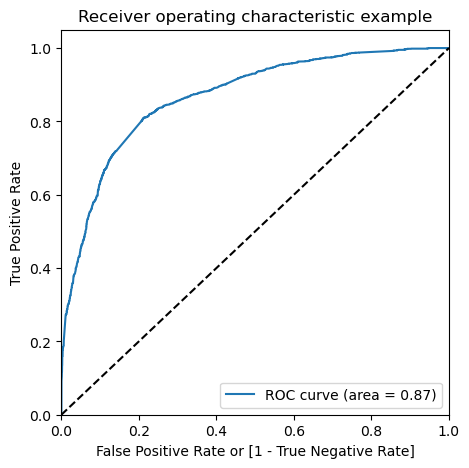

In [935]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [936]:
# Given the substantial area under the ROC curve (AUC) of 0.89, it indicates that our model performs well in distinguishing between classes. 
# This strong performance in the ROC analysis suggests the effectiveness of the model in classification tasks.


In [937]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.306808,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.281749,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.201797,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.771606,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.681516,7987,1,1,1,1,1,1,1,1,0,0,0


In [938]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.576445  0.971791  0.328809
0.2   0.2  0.686506  0.918234  0.541357
0.3   0.3  0.777358  0.839330  0.738540
0.4   0.4  0.806015  0.710957  0.865557
0.5   0.5  0.802078  0.659035  0.891677
0.6   0.6  0.787278  0.578904  0.917798
0.7   0.7  0.764289  0.481603  0.941357
0.8   0.8  0.734530  0.354865  0.972343
0.9   0.9  0.707763  0.257155  0.990013


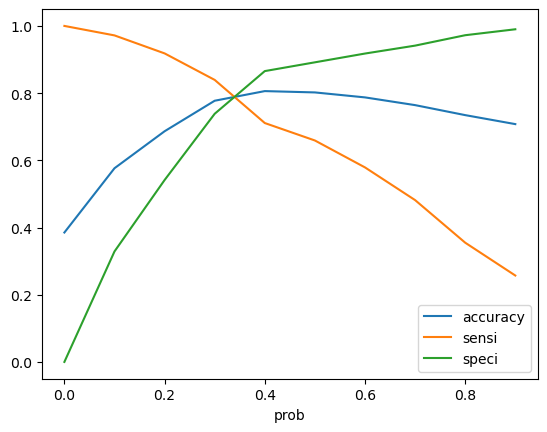

In [939]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [940]:
# Based on the analysis of the curve, we identified 0.35 as the optimal threshold for setting a cutoff probability. 
# This particular point on the curve is considered the most suitable for achieving the desired balance or performance in our classification model.

In [941]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.306808,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.281749,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.201797,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.771606,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.681516,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [942]:
# Checking Lead Score On the Training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.306808,3009,0,1,1,1,1,0,0,0,0,0,0,0,31
1,0,0.281749,1012,0,1,1,1,0,0,0,0,0,0,0,0,28
2,0,0.201797,9226,0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.771606,4750,1,1,1,1,1,1,1,1,1,0,0,1,77
4,1,0.681516,7987,1,1,1,1,1,1,1,1,0,0,0,1,68


In [943]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8020784128483703


In [944]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3482,  423],
       [ 834, 1612]], dtype=int64)

In [945]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives


In [946]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7921375921375922


In [947]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8067655236329935


In [948]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1932344763670065


In [949]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6590351594439902


In [950]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8916773367477593


# PRECISION AND RECALL 😐

In [951]:
from sklearn.metrics import precision_score, recall_score

In [952]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7921375921375922


In [953]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6590351594439902


In [954]:
# Precision - Recall Tradeoff

from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [955]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

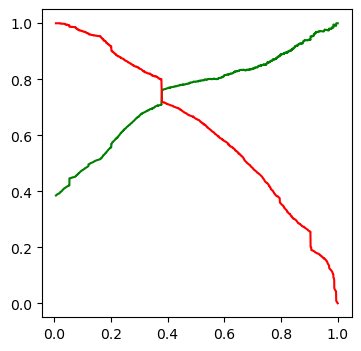

In [956]:
# plotting a trade-off curve between precision and recall
plt.figure(figsize=(4,4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#  MAKING PREDICTIONS ON TEST SET 🤩🤞

In [957]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [958]:
# columns selected by the final model to the X_test 

X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_page visited on website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0
1490,0,1.887326,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,1,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0


In [959]:
# Adding a constant

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.212266
1490    0.985987
7936    0.184985
4216    0.794833
3830    0.214697
1800    0.782871
6507    0.202747
4821    0.443786
4223    0.903153
4714    0.201797
dtype: float64

In [960]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [961]:
# see the head
y_pred_1.head()

,0
3271,0.212266
1490,0.985987
7936,0.184985
4216,0.794833
3830,0.214697


In [962]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [963]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [964]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [965]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [966]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.212266
1,1,1490,0.985987
2,0,7936,0.184985
3,1,4216,0.794833
4,0,3830,0.214697


In [967]:
# Renaming the column of data 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [968]:
# arranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [969]:
# head of y_pred_final

y_pred_final.head()


,Prospect ID,Converted,Converted_prob
0,3271,0,0.212266
1,1490,1,0.985987
2,7936,0,0.184985
3,4216,1,0.794833
4,3830,0,0.214697


In [970]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [971]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.212266,0
1,1490,1,0.985987,1
2,7936,0,0.184985,0
3,4216,1,0.794833,1
4,3830,0,0.214697,0


In [972]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7855306647080426


In [973]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1338,  396],
       [ 188,  801]], dtype=int64)

In [974]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [975]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8099089989888777


In [976]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7716262975778547


In [977]:
# Assign the lead score to test data

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.212266,0,21
1,1490,1,0.985987,1,99
2,7936,0,0.184985,0,18
3,4216,1,0.794833,1,79
4,3830,0,0.214697,0,21


In [978]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.985987,1,99
8,4223,1,0.903153,1,90
21,2461,1,0.986831,1,99
23,5822,1,0.993267,1,99
25,2684,1,0.993267,1,99
...,...,...,...,...,...
2678,1467,1,0.951376,1,95
2679,4766,1,0.905819,1,91
2684,8343,0,0.954540,1,95
2686,8052,1,0.993267,1,99


In [979]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518, 4543,
       4830, 4365, 3542, 7674, 8596, 6947,  446,  789, 8372, 5805,  337,
       1561,  737, 2176, 6423, 7174, 1436, 7552, 3932, 1475, 5785, 1867,
       2860, 4018, 7253, 4297, 5490, 1995,  999, 1997, 5797, 7653,   76,
       6743, 7695, 1663, 6598, 3288, 8959, 7521, 8282, 8213, 9063, 5292,
       6913, 1481,  785, 2985, 3265, 3285, 7433, 3858, 2009, 8106, 8207,
        373, 4179, 8568, 5141, 6784, 6754, 2960, 7753, 3983,  802, 8745,
        505, 8509, 6094, 7036, 2680,  112, 6149, 7157, 7175, 1675, 6999,
       5826, 6499, 1296, 3628, 3439, 4612, 7129, 4793, 3227, 2121, 2495,
       3739,  822, 3072, 7952, 2378, 7699, 5638, 8077, 2727, 2961, 4532,
       1542, 5656, 2630, 8205,  232, 6332, 4922, 8461, 7202, 5087,  174,
       2674, 8065, 1568, 8597, 4708, 6538, 5700, 1388, 5815, 7970, 7902,
       5804, 4081, 5824,   64,  170, 2650, 5808, 2345, 4578, 4803, 5810,
       2473, 3582,  350, 2584, 3727, 1454, 4403, 31

In [980]:
res.params.sort_values(ascending=False)

Lead Origin_lead add form                               3.868691
What is your current occupation_working professional    2.761273
Lead Source_welingak website                            2.083912
Lead Source_olark chat                                  1.139285
Total Time Spent on Website                             1.126930
const                                                  -0.634490
Last Notable Activity_modified                         -0.878449
Last Notable Activity_page visited on website          -0.900420
Do Not Email                                           -1.068618
Last Activity_converted to lead                        -1.150549
Last Activity_email bounced                            -1.385372
Last Activity_olark chat conversation                  -1.482970
dtype: float64